<a href="https://colab.research.google.com/github/YunJinHeo/Machine-learning-Deep-learning-to-study-alone/blob/main/CH5_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05-1 Decision Tree


In [1]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state = 42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7859195402298851
0.7655384615384615


In [7]:
print(lr.coef_, lr.intercept_)

[[ 0.53272315  1.67940138 -0.70910354]] [1.84709816]


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9973316912972086
0.8516923076923076


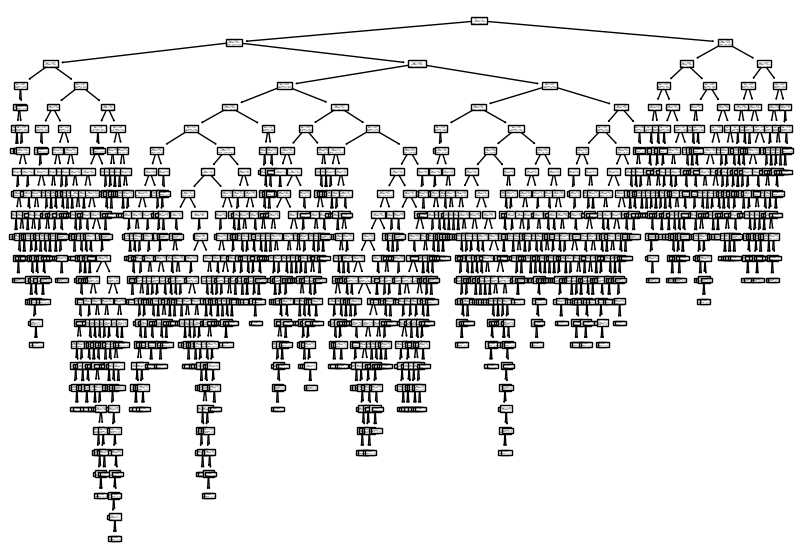

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

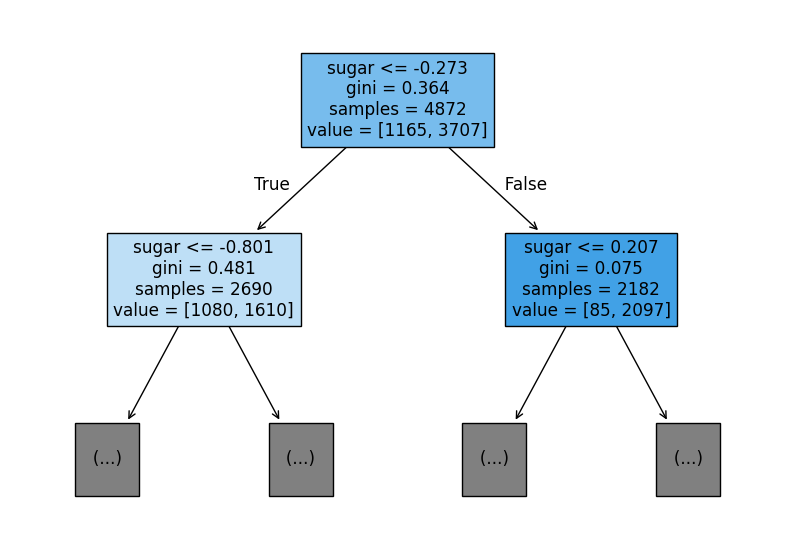

In [10]:
plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [11]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8499589490968801
0.8363076923076923


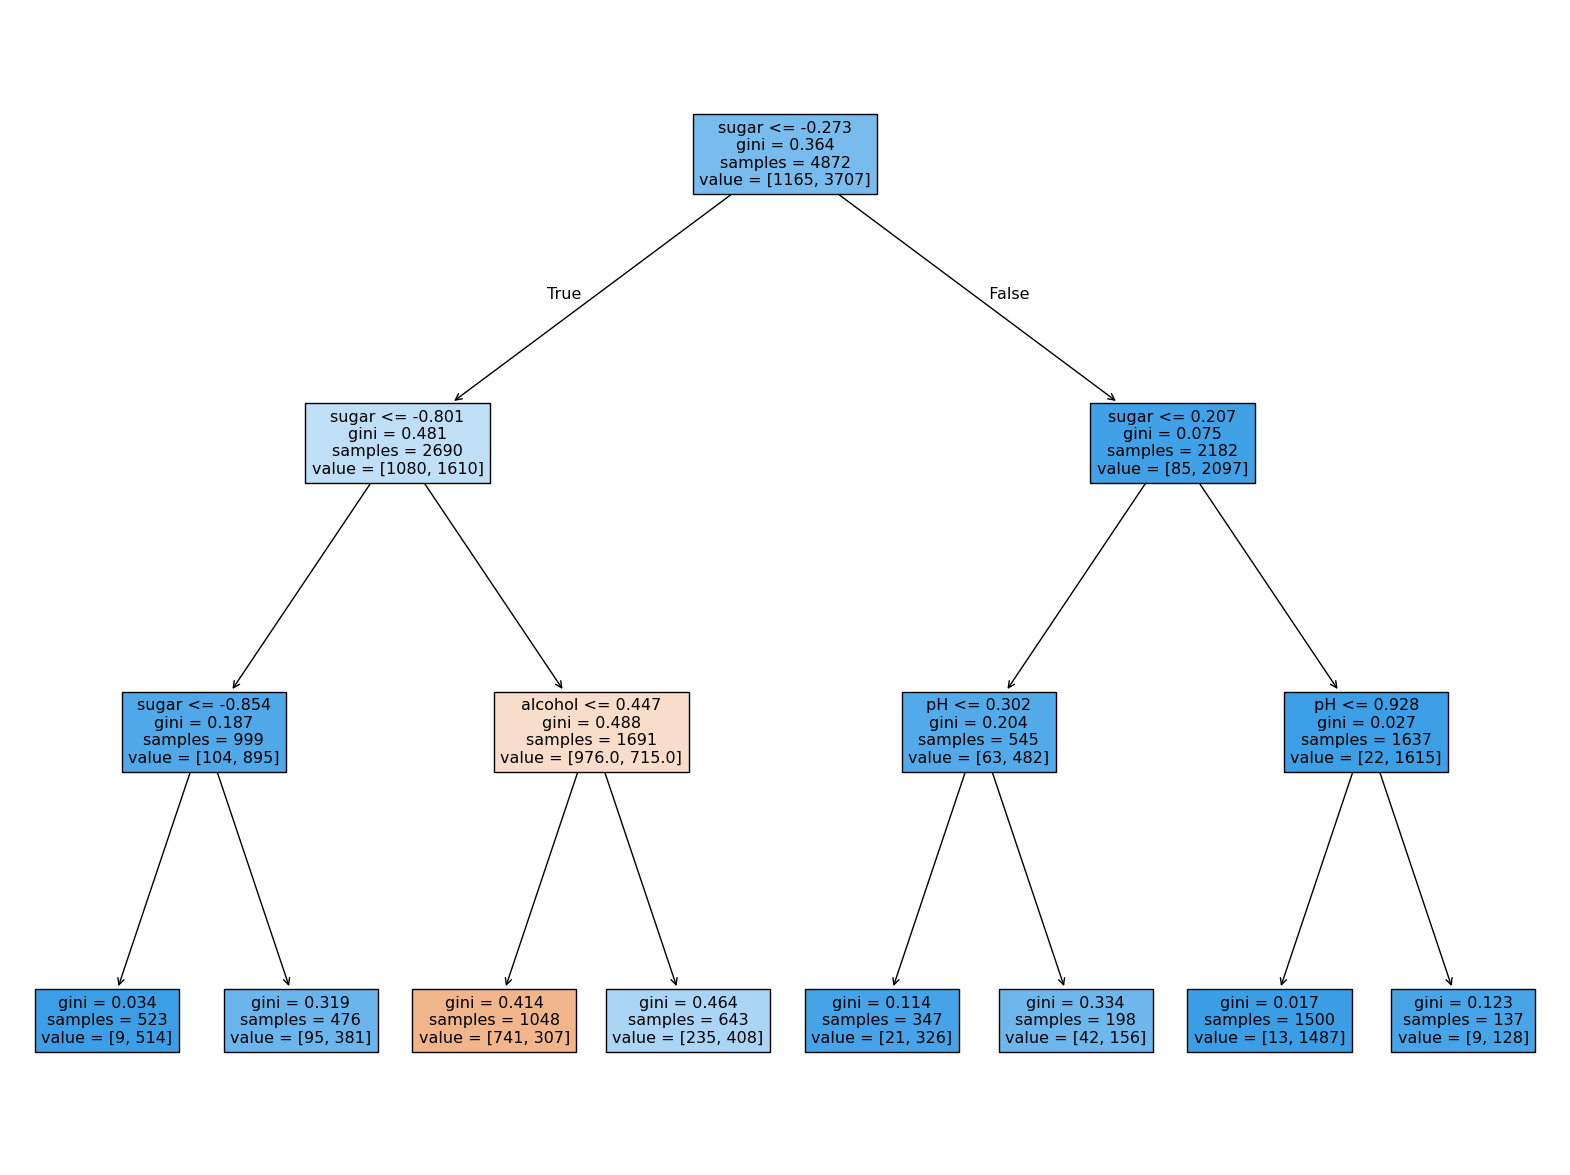

In [12]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [13]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8499589490968801
0.8363076923076923


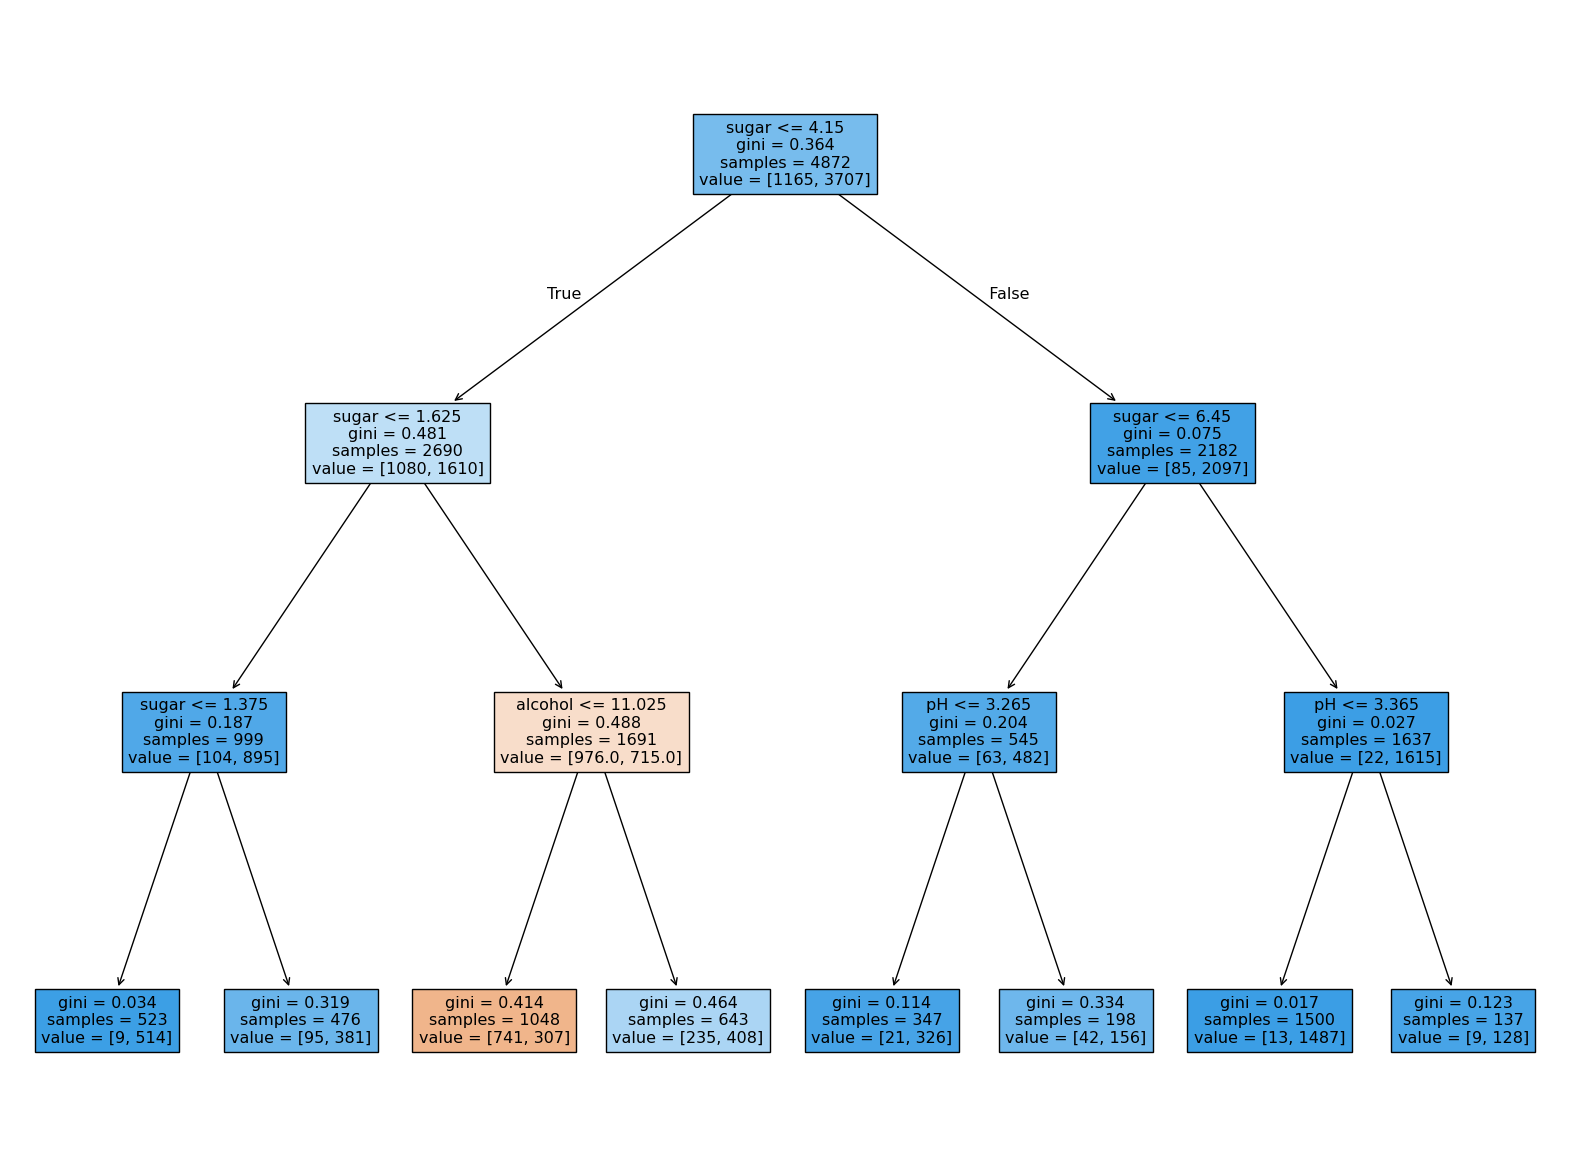

In [14]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [15]:
print(dt.feature_importances_)

[0.12871631 0.86213285 0.00915084]


0.8975779967159278
0.8590769230769231


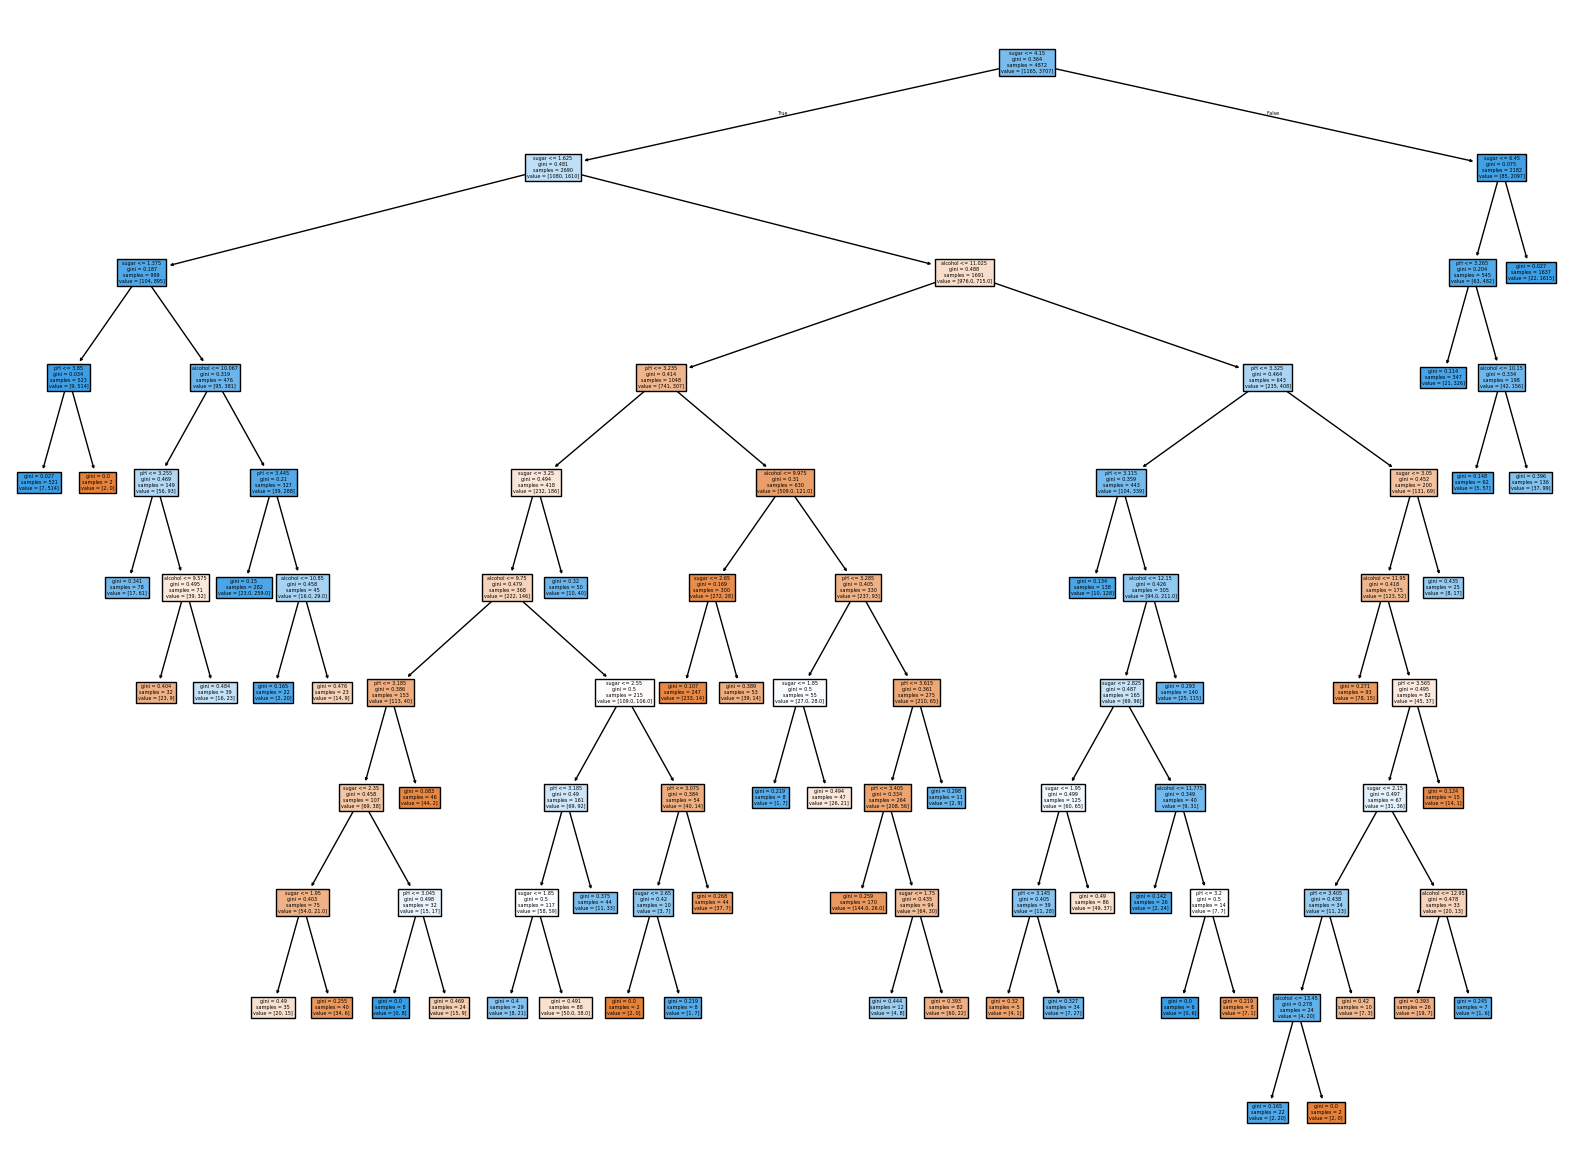

In [16]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

# 05-2 Cross Validation and GridSearch

In [17]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [18]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [19]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine["class"].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [21]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [22]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [24]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01379848, 0.01282573, 0.01515031, 0.01400161, 0.01381087]), 'score_time': array([0.00211787, 0.00211596, 0.00210977, 0.00232363, 0.00208116]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [25]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [26]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [27]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [28]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs=-1)

In [29]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [30]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [31]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [32]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [33]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [34]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5,20,1),
          'min_samples_split' : range(2, 100, 10)
          }


In [35]:
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [36]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.892053107562055


In [37]:
dt

DecisionTreeClassifier(max_depth=14, min_impurity_decrease=0.0004,
                       min_samples_split=12, random_state=42)

In [38]:
from scipy.stats import uniform, randint

In [39]:
rgen = randint(0,10)
rgen.rvs(10)

array([9, 1, 3, 5, 4, 9, 2, 6, 8, 7])

In [40]:
np.unique(rgen.rvs(1000), return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 94,  99, 116,  92, 102,  99,  98,  93, 102, 105]))

In [41]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.79789049, 0.19231069, 0.07066608, 0.34954102, 0.71503856,
       0.42742438, 0.21378932, 0.39044304, 0.89210029, 0.92633796])

In [42]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : randint(2,25),
          'min_samples_leaf' : randint(1,25)}


In [43]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), params, n_iter = 100, n_jobs = -1, random_state = 42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5b3cc4a350>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5b3cc4a0b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5b3cc484f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5b3cc49480>},
                   random_state=42)

In [44]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [45]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [46]:
dt = gs.best_estimator_
dt.score(test_input, test_target)

0.86

In [47]:
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42, splitter = 'random'), params, n_iter = 100, n_jobs = -1, random_state = 42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5b3cc4a350>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5b3cc4a0b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5b3cc484f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a5b3cc49480>},
                   random_state=42)

In [48]:
dt = gs.best_estimator_
dt.score(test_input, test_target)

0.786923076923077

# 05.3 Ensemble of the tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
test_input, train_input, test_target, train_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1)
scores

{'fit_time': array([1.20088172, 0.69056654, 0.79477406, 0.60014892, 0.67548203]),
 'score_time': array([0.10525441, 0.08296537, 0.11700344, 0.06639242, 0.03888631]),
 'test_score': array([0.85384615, 0.83461538, 0.86923077, 0.85      , 0.87307692]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [5]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.8561538461538462


In [6]:
rf.fit(train_input, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [7]:
rf.feature_importances_

array([0.24058176, 0.46945436, 0.28996388])

In [8]:
rf = RandomForestClassifier(n_jobs = -1, oob_score = True, random_state = 42)
rf.fit(train_input, train_target)
rf.oob_score_

0.8676923076923077

In [9]:
 from sklearn.ensemble import ExtraTreesClassifier
 et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
 scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs = -1)
 print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.8569230769230769


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9046153846153846 0.8584615384615384


In [11]:
gb = GradientBoostingClassifier(random_state = 42, n_estimators=100, learning_rate = 0.2)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9348076923076922 0.8553846153846154


In [12]:
gb.fit(train_input, train_target)
gb.feature_importances_

array([0.19848621, 0.63793255, 0.16358124])

In [13]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state = 42)
socres = cross_validate(hgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9348076923076922 0.8553846153846154


In [14]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.14092308 0.27415385 0.13746154]


In [15]:
result = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.04546854 0.17794882 0.03686742]


In [16]:
hgb.score(test_input, test_target)

0.8597267654416009

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'auto', random_state = 42)
scores = cross_validate(xgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9978846153846153 0.85


In [19]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.989423076923077 0.8507692307692307
